In [1]:
# import required libraries
import numpy as np
import pandas as pd
#import chardet
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pytz

# Useful Functions

In [2]:
# function to remove outliers
def remove_outlier_by_col(df_name, col_name, n_sd):
    col_mean=df_name[col_name].mean()
    col_sd=df_name[col_name].std()
    fence_low = col_mean - n_sd*col_sd
    fence_high = col_mean + n_sd*col_sd
    df_name = df_name.loc[(df_name[col_name] > fence_low) & (df_name[col_name] < fence_high)]
    return df_name

# converting the home ownership column in to numeric values to find co-relation
def getHomeOwnership (h):
    if h == "NONE":
        return 1
    elif h =="OTHER":
        return 2
    elif h == "MORTGAGE":
        return 3
    elif h == "RENT":
        return 4
    else:
        return 5
    
# function to get all stats of the data frame in one go
def data_frame_stats(df_name):
    '''Function to gather stats of dataframes'''
    print("INFO of this dataframe")
    print("---"*20)
    print(df_name.info())
    print("---"*20)
    print("SHAPE :"+str(df_name.shape))
    print("---"*20)
    print("LENGTH :"+str(len(df_name)))

# Data Sourcing

In [3]:
# Below code to identify encoding of given file
#rawData = open("loan.csv",'rb').read()
#output = chardet.detect(rawData)
#print(output["encoding"]) # the output is utf-8

In [4]:
df = pd.read_csv('loan.csv',encoding="utf-8",low_memory=False)

# Data Understanding

   We imported load.csv file which holds data of loans issued. From below statistics we gather that total we have 39717 loans issued. We have 111 columns which holds data realted to that loan using which we will perform our analysis. 

In [5]:
data_frame_stats(df)

INFO of this dataframe
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
------------------------------------------------------------
SHAPE :(39717, 111)
------------------------------------------------------------
LENGTH :39717


From below output we can see that we have around 54(count derived later in data cleaning session)columns having 100% missing values. 
We looked for the meaning of columns in data dictionary and for certain columns, such as grade, subgrade,dti, earliest_cr_line, inq_last_6mths, revol_util and few more, we have gone through external references to get better understanding .

In [6]:
# Identifying missing value % in each column
round((df.isnull().sum()/len(df.index)*100),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

# Data Cleaning & Data Manipulation

In [7]:
# During data understanding process we found that there are many columns with 100% missing values. 
# Those columns are not going to be useful in our analysis, so dropping those columns.
df.dropna(axis=1, how='all',inplace=True)
round((df.isnull().sum()/len(df.index)*100),2).sort_values(ascending=False)

next_pymnt_d                  97.13
mths_since_last_record        92.99
mths_since_last_delinq        64.66
desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.14
collections_12_mths_ex_med     0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
collection_recovery_fee        0.00
acc_now_delinq                 0.00
application_type               0.00
url                            0.00
pymnt_plan                     0.00
loan_status                    0.00
issue_d                        0.00
verification_status            0.00
annual_inc                     0.00
home_ownership                 0.00
delinq_amnt                    0.00
sub_grade                      0.00
grade                          0.00
installment                 

In [8]:
# From above statisctics we see that next_pymnt_d,mths_since_last_record and mths_since_last_delinq columns have > 60% missing values.
# Due to this we are dropping these columns.
df.drop(["next_pymnt_d","mths_since_last_record","mths_since_last_delinq"], axis=1, inplace=True)

In [9]:
# After dropping > 60% missing values, checking shape of the frame
# Total we had 111 columns, out of which 57 columns had > 60% missing values which are dropped and left with 57 columns.
df.shape

(39717, 54)

Now, we are left with columns which has values and certain% missing values. We will go through each column and take required action.

### Analyzing id and member_id column

In [10]:
# From below count we see that both id and member_id columns' unqiue value count matches with total no. of rows, so it means that there are no duplicate id or member_id data.
# As we have to find the risk involved we are dropping id & member_id columns which we think will not play any role in our analysis.
print("Total no. of unique id in data frame: {0}".format(df.id.nunique()))
print("Total no. of unique member_id in data frame: {0}".format(df.member_id.nunique()))
df.drop(["id","member_id"],axis=1,inplace=True)

Total no. of unique id in data frame: 39717
Total no. of unique member_id in data frame: 39717


### Analyzing loan_amount column

In [11]:
# Checking for the column
# It says that the Avg  loan  amount  is. 11219.443815
# The Median is loan Amount is 10000.
# From Count it is clear that there are no null values in this column, so no cleaning required.
df['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

### Analyzing funded_amnt column

In [12]:
# This shows that the total fund amount is quite similar to the total Loan Amount
# From Count it is clear that there are no null values in this column, so no cleaning required.
df['funded_amnt'].describe() 

count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

### Analyzing funded_amnt_inv column

In [13]:
# Checking the funded_amount_inv column details
# From Count it is clear that there are no null values in this column, so no cleaning required.
df['funded_amnt_inv'].describe() 

count    39717.000000
mean     10397.448868
std       7128.450439
min          0.000000
25%       5000.000000
50%       8975.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

### Analyzing term column

In [14]:
# Checking the values in term of the loan
# From Count it is clear that there are no null values in this column, so no cleaning required.
df['term'].describe()

count          39717
unique             2
top        36 months
freq           29096
Name: term, dtype: object

In [15]:
# From below we can see that there are two type of tenure of loans 36 months and 60 months.
df['term'].value_counts() 

 36 months    29096
 60 months    10621
Name: term, dtype: int64

### Analyzing int_rate column

In [16]:
# Checking for the column
df['int_rate'].value_counts().sort_values(ascending = False).head()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
Name: int_rate, dtype: int64

In [17]:
# From Count it is clear that there are no null values in this column, so no cleaning required.
# Here we can see that top frequency of the interest rate is 10.99% and freq = 956 and 351 different types of the intrest rates.
df['int_rate'].describe()

count      39717
unique       371
top       10.99%
freq         956
Name: int_rate, dtype: object

In [18]:
# Converting int_rate to type float
df['int_rate'] = df['int_rate'].str.replace('%', '').astype(float) 

In [19]:
# From this we can say that this column is now converted to float
df['int_rate'].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

### Analyzing installment column

In [20]:
# From Count it is clear that there are no null values in this column, so no cleaning required.
df['installment'].describe()

count    39717.000000
mean       324.561922
std        208.874874
min         15.690000
25%        167.020000
50%        280.220000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64

### Analyzing grade column

In [21]:
# From below, we can say that there are no missing values and we have grade ranging from A to G
df.grade.value_counts(dropna = False)

B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

### Analyzing sub_grade column

In [22]:
# From below, we can say that there are no missing values and we have sub grade ranging from A1,A2,A3,A4,A5,B1.....to G5
df.sub_grade.value_counts(dropna = False)

B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64

### Analyzing emp_title column

In [23]:
# From below we can see thta 2459 values are missing. 
df['emp_title'].value_counts(dropna=False) 

NaN                                   2459
US Army                                134
Bank of America                        109
IBM                                     66
AT&T                                    59
Kaiser Permanente                       56
Wells Fargo                             54
USAF                                    54
UPS                                     53
US Air Force                            52
Walmart                                 45
Lockheed Martin                         44
United States Air Force                 42
State of California                     42
U.S. Army                               41
Self Employed                           40
Verizon Wireless                        40
USPS                                    39
US ARMY                                 39
Walgreens                               38
JP Morgan Chase                         37
JPMorgan Chase                          36
Department of Defense                   36
Self       

In [24]:
# Checking the Employee Title and we don't find any significance to this column, so we decided to remove this column
df.drop('emp_title', axis =1, inplace = True) 

### Analyzing emp_length column

In [25]:
# Checking the pattern of employment
# We see that 1075 are missing values
df['emp_length'].value_counts(dropna=False) 

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
NaN          1075
Name: emp_length, dtype: int64

In [26]:
df['emp_length'].describe()

count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object

In [27]:
# We are imputing missing values with 0
# We are categorizing the values such as < 1 years as 1 year and 10+ years as 10 years and then converting it to numeric, so it can be used in analysis
df['emp_length'].fillna(value=0,inplace=True)
df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df['emp_length'] = df['emp_length'].astype(int)

In [28]:
# After replacing missing values and converting to numeric, rechecking for pattern
df['emp_length'].value_counts(dropna=False) 

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
0     1075
Name: emp_length, dtype: int64

### Analyzing home_ownership column


In [29]:
# From below output it is clear, that there are no duplicate data with speling mistake or case. 
# All are in uppercase, so no need of case conversion.
df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [30]:
# Convert home_ownership column into category column.
df.home_ownership = df.home_ownership.astype("category")
df.home_ownership.value_counts(dropna=False)

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

### Analyzing verification_status column

In [31]:
# From below output it is clear, that there are no duplicate data with spelling mistakes or case. 
# All are in title case, so no need of case conversion.
df.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [32]:
# Convert verification_status column into category column.
df.verification_status = df.verification_status.astype("category")
df.verification_status.value_counts(dropna=False)

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

### Analyzing loan_status column


In [33]:
# From below output it is clear, that there are no duplicate data with spelling mistakes or case. 
# All are in title case, so no need of case conversion.
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [34]:
# Convert loan_status column into category column.
df.loan_status = df.loan_status.astype("category")
df.loan_status.value_counts(dropna=False)

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

### Analyzing purpose column

In [35]:
# From below output it is clear, that there are no duplicate data with spelling mistakes or case. 
# All are in lower case, so no need of case conversion.
df.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [36]:
# Convert purpose column into category column.
df.purpose = df.purpose.astype('category')
df.purpose.value_counts(dropna=False)

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

### Analyzing zip_code column


In [37]:
# As per the data dictionary, only first 3 digits of the zip code is given.
# Total 823 unique zip codes are availableble
len(df.zip_code.unique())

823

In [38]:
# As we have addr_state column in our dataset for region wise analysis, so we will be dropping zip_code column
df.drop("zip_code", axis=1,inplace=True)

### Analyzing addr_state column


In [39]:
df.addr_state.unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [40]:
# Convert addr_state into category column
df.addr_state = df.addr_state.astype("category")
df.addr_state.value_counts(dropna=False)

CA    7099
NY    3812
FL    2866
TX    2727
NJ    1850
IL    1525
PA    1517
VA    1407
GA    1398
MA    1340
OH    1223
MD    1049
AZ     879
WA     840
CO     792
NC     788
CT     751
MI     720
MO     686
MN     615
NV     497
SC     472
WI     460
AL     452
OR     451
LA     436
KY     325
OK     299
KS     271
UT     258
AR     245
DC     214
RI     198
NM     189
WV     177
HI     174
NH     171
DE     114
MT      85
WY      83
AK      80
SD      64
VT      54
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

### Analyzing issue_d column

In [41]:
df.issue_d.head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [42]:
# Converting issue_d column to datetime.
df["issue_d"]  = pd.to_datetime(df['issue_d'],format="%b-%y")
df.issue_d.head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

### Analyzing earliest_cr_line column

In [43]:
# Convert earliest_cr_line to datetime datatype
df['earliest_cr_line']= pd.to_datetime(df['earliest_cr_line'],format="%b-%y")

In [44]:
# From above we can see that data of year 1950 to 1966 is not converted properly as panda is not able to recogniz....
pd.DatetimeIndex(df.earliest_cr_line).year.unique()

Int64Index([1985, 1999, 2001, 1996, 2004, 2005, 2007, 1998, 1989, 2003, 1991,
            1993, 1997, 1983, 2002, 1984, 2006, 1987, 1981, 2000, 1994, 1995,
            1992, 1986, 1990, 1988, 1980, 2008, 1973, 1979, 1982, 1978, 1971,
            1972, 1970, 1969, 1975, 1976, 1977, 2062, 2068, 1974, 2064, 2067,
            2065, 2063, 2054, 2066, 2059, 2056, 2046, 2050, 2061],
           dtype='int64', name='earliest_cr_line')

In [45]:
df["earliest_cr_line"] = df.earliest_cr_line.apply(lambda d : d - pd.DateOffset(years=100) if d > datetime.datetime(2018,12,31) else d)

In [46]:
df.earliest_cr_line.dt.year.sort_values(ascending=False).unique()

array([2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998,
       1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987,
       1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976,
       1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966, 1965,
       1964, 1963, 1962, 1961, 1959, 1956, 1954, 1950, 1946], dtype=int64)

### Analyzing revol_util column

In [47]:
# Revolving line utilization rate.Its an object, so need to convert to number by removing %
df.revol_util .head()

0    83.70%
1     9.40%
2    98.50%
3       21%
4    53.90%
Name: revol_util, dtype: object

In [48]:
df.revol_util=df.revol_util.str.rstrip('%').astype(float)

In [49]:
# Mean and Median are same, so no outliers and since its percentage its with range from 0 to 100 .
df.revol_util.describe()

count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

### Analyzing pub_rec_bankruptcies column

In [50]:
df.pub_rec_bankruptcies.value_counts(normalize=True,dropna=False)

 0.0    0.940126
 1.0    0.042148
NaN     0.017549
 2.0    0.000176
Name: pub_rec_bankruptcies, dtype: float64

In [51]:
# Here, we are imputing missing value with 0.
df.pub_rec_bankruptcies=df.pub_rec_bankruptcies.fillna(0)
df.pub_rec_bankruptcies.value_counts(normalize=True,dropna=False)

0.0    0.957676
1.0    0.042148
2.0    0.000176
Name: pub_rec_bankruptcies, dtype: float64

### Analyzing pub_rec column

In [52]:
df.pub_rec.value_counts(normalize=True,dropna=False)

0    0.946723
1    0.051766
2    0.001284
3    0.000176
4    0.000050
Name: pub_rec, dtype: float64

In [53]:
# There are certain columns which are not required for the analysis, so dropping those to keep frame clean
df.drop(["pymnt_plan","url","desc","title","total_acc","initial_list_status","out_prncp","out_prncp_inv"], axis=1, inplace=True)
df.drop(["total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","delinq_amnt"],axis=1, inplace=True)
df.drop(["collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","tax_liens"],axis=1, inplace=True)
df.drop(["collections_12_mths_ex_med","policy_code","application_type","acc_now_delinq","chargeoff_within_12_mths"],axis=1, inplace=True)

In [54]:
df.shape

(39717, 25)

# Analysis

## Type Driven Metrics

In [55]:
# Deriving ordered categorical column for home_ownership. This will be useful in checking correlation
# 
df["home_ownership_OC"] = df.home_ownership.apply(lambda h : getHomeOwnership(h) ).astype(int)

In [56]:
#  Derive ordered categorical column from loan_status column, so we can find correlation.
# Charged Off = 1; Current = 2; Fully Paid = 3
df["loan_status_OC"] = df.loan_status.apply(lambda l : 1 if l =="Charged Off" else (2 if l == "Current" else 3)).astype(int)


## Data Driven Metrics

In [57]:
# Derive credit_age_days column using earliest_cr_line and issue_d column
df["credit_age_days"] = (df.issue_d - df.earliest_cr_line).astype(str)
df["credit_age_days"] = df["credit_age_days"].apply(lambda d:d.split(' ')[0]).astype(np.int)
df.credit_age_days.head()

0    9830
1    4627
2    3682
3    5782
4    5813
Name: credit_age_days, dtype: int32

## Univariate & Segmented Univariate Analysis

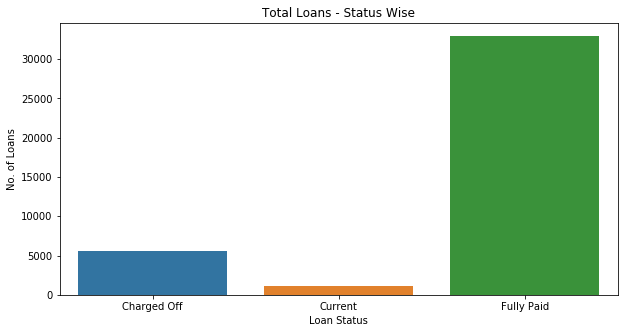

In [58]:
# Total loans status wise
plt.figure(figsize=(10, 5))
sns.countplot(df.loan_status)
plt.title("Total Loans - Status Wise")
plt.xlabel("Loan Status")
plt.ylabel("No. of Loans")
plt.show()

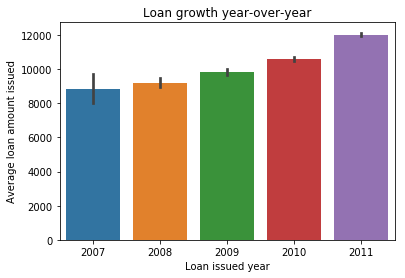

In [59]:
# Loan growth year-over-year
sns.barplot(x=df.issue_d.dt.year,y=df.loan_amnt)
plt.title("Loan growth year-over-year")
plt.xlabel("Loan issued year")
plt.ylabel("Average loan amount issued")
plt.show()

In [60]:
# Now first for univariable analysis let us check that how many columns we are left with
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'pub_rec_bankruptcies', 'home_ownership_OC', 'loan_status_OC',
       'credit_age_days'],
      dtype='object')

In [61]:
# This dataset contains charged off loans' data
Charged_off = df.loc[df.loan_status_OC ==1]

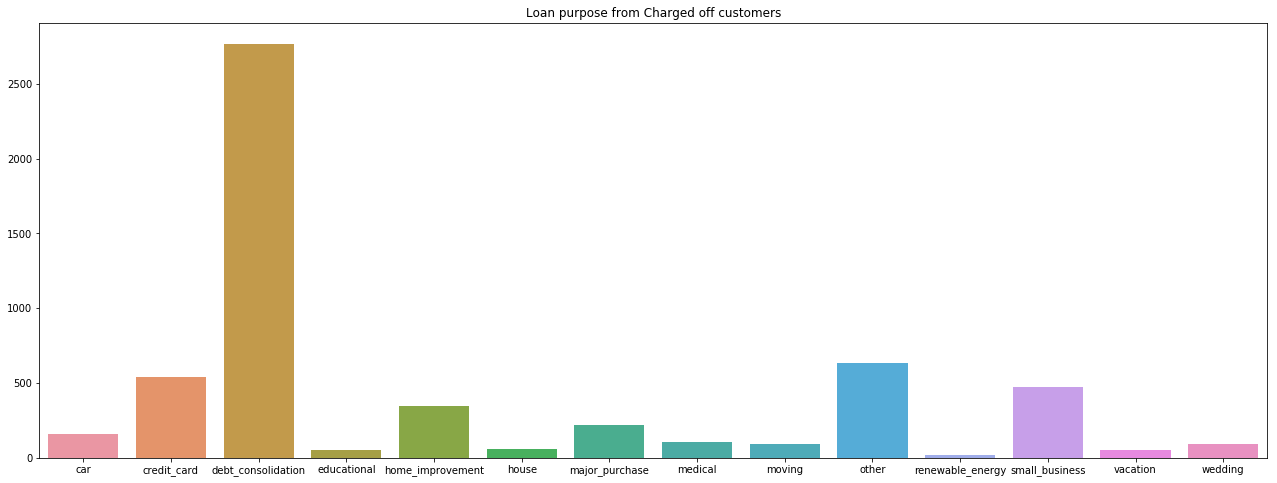

In [62]:
plt.figure(figsize=(22,8))
sns.countplot(x=Charged_off.purpose)
plt.xlabel("")
plt.ylabel("")
plt.title("Loan purpose from Charged off customers")
plt.show()


### Analysis of term column
     Independently this column does not give any insight. We will take this futher in bivariate analysis.

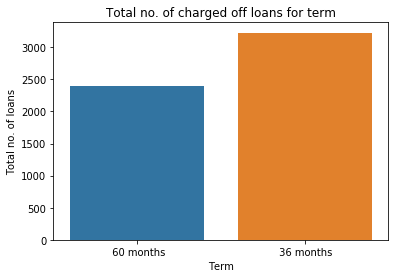

In [63]:
sns.countplot(Charged_off.term)
plt.title("Total no. of charged off loans for term")
plt.xlabel("Term")
plt.ylabel("Total no. of loans")
plt.show()

### Analysis of int_rate column
     From below analysis we can not say int_rate has any impact for default, we will see this further in bivariate analysis.

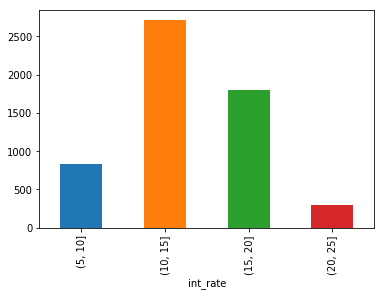

In [64]:
bins= [5,10,15,20,25]
dfIR = Charged_off.groupby(pd.cut(Charged_off['int_rate'], bins=bins)).int_rate.count()
dfIR.plot(kind='bar')

### Analysis of grade column
     From below analysis and analysis of int_rate, we can say that loans within 10% to 20% intereset rate range that is B to D grade has more default case.

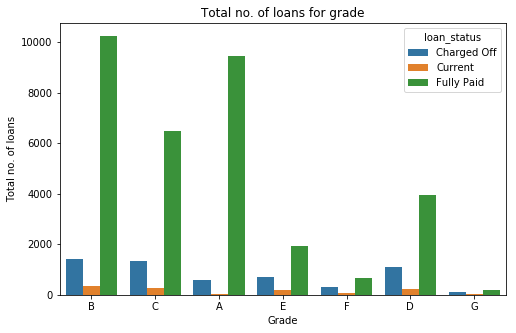

In [65]:
plt.figure(figsize=(8,5))
sns.countplot(x="grade",data=df,hue="loan_status")
plt.title("Total no. of loans for grade")
plt.xlabel("Grade")
plt.ylabel("Total no. of loans")
plt.show()

### Analysis of emp_length column

    Clearly we can see that the median emp length will not play any role in the analyis

count    39717.000000
mean         4.954226
std          3.461960
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64
count    5627.000000
mean        4.988626
std         3.527185
min         0.000000
25%         2.000000
50%         4.000000
75%         9.000000
max        10.000000
Name: emp_length, dtype: float64


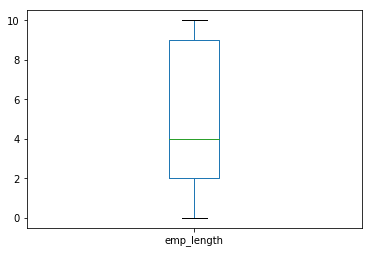

In [66]:
print(df['emp_length'].describe())
df['emp_length'].plot.box()
print(Charged_off.emp_length.describe())

### Analysis of  home_ownership column
From below graph it is clear that people leaving in Rented house are likely to have more chances of default.
We will see this in more detail in bivariate analysis.

RENT        2839
MORTGAGE    2327
OWN          443
OTHER         18
NONE           0
Name: home_ownership, dtype: int64


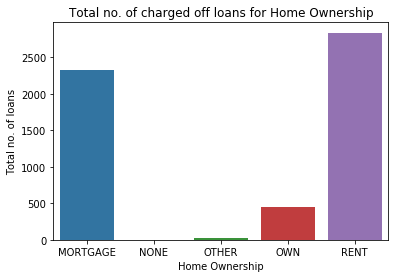

In [67]:
# so we can clearly say that the over 50% of the borrowers have the house type rent and the next is Mortgage.
print(Charged_off.home_ownership.value_counts())
sns.countplot(Charged_off.home_ownership)
plt.title("Total no. of charged off loans for Home Ownership")
plt.xlabel("Home Ownership")
plt.ylabel("Total no. of loans")
plt.show()

### Analysis for  dti column
From below we can see that loans having DTI ration within 10-20 have more likely charged off. Which is similar to the output of grade and int_rate univariate analysis. So there is correlation between DTI, grade and int_rate. Considering this we are taking DTI further for bivariate analysis.

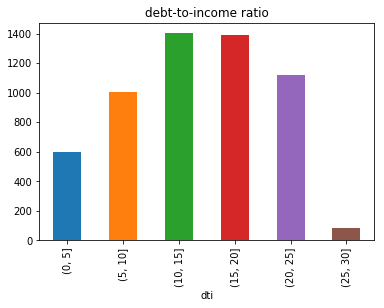

In [68]:
bins= [0,5,10,15,20,25,30]
dfCO = Charged_off.groupby(pd.cut(Charged_off['dti'], bins=bins)).dti.count()
dfCO.plot(kind='bar',title='debt-to-income ratio')

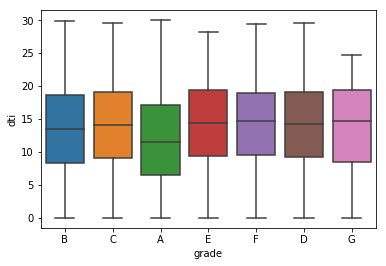

In [69]:
# Bivariate analysis between DTI & Grade: Kept here as it fits here better
# We can see that dti is playing some role in to our analysis because we can say that for lower dti the grades are good and 
# as grades are heighly co-related with the intrest rate then we can say that dti is co-related with the intrest rate.
ax = sns.boxplot(y="dti", x="grade", data=df)


## Analysis for annual_inc column
The higher income people are more likely to pay their loan and as per the graph plotted between loan status and annual income, the person who are having lesser income are more likely to charge off.

In [70]:
Charged_off['log_annual_inc'] = Charged_off['annual_inc'].apply(lambda x: np.log10(x+1))

C:\Users\nabil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


C:\Users\nabil\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


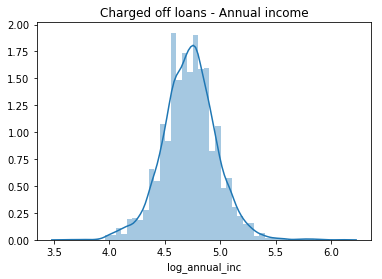

In [71]:
sns.distplot(Charged_off.log_annual_inc)
plt.title("Charged off loans - Annual income")
plt.show()

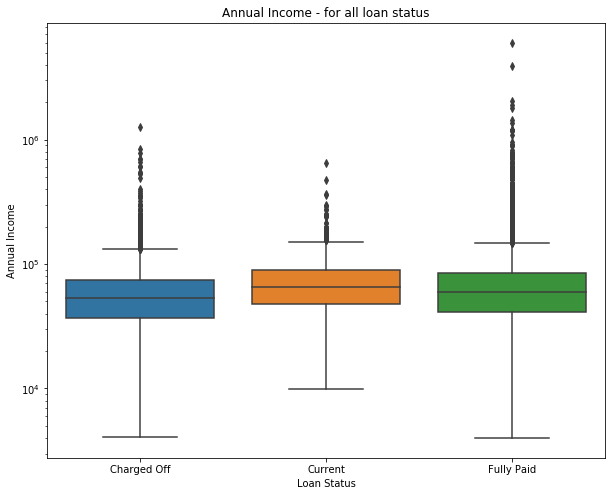

In [72]:
plt.figure(figsize=(10,8))
sns.boxplot(x="loan_status", y="annual_inc",data=df)
plt.title("Annual Income - for all loan status")
plt.xlabel("Loan Status")
plt.ylabel("Annual Income")
plt.yscale('log')
plt.show()

### Analysis for verification_status column
From below it is clear that verfication status has no relevance with loan being default.

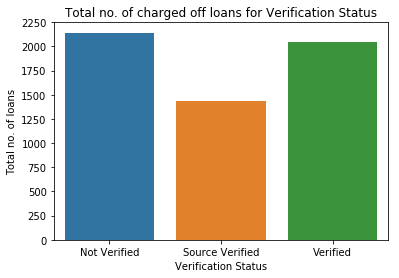

In [73]:
sns.countplot(Charged_off.verification_status)
plt.title("Total no. of charged off loans for Verification Status")
plt.xlabel("Verification Status")
plt.ylabel("Total no. of loans")
plt.show()

### Analysis for purpose column
From below it is clear that loans which are taken for debt_consolidation are more likely to go in default.

In [74]:
# Majority of people are taking loan for debt_consolidation
df['purpose'].value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

In [75]:
df.pu_ls = df.groupby(['purpose', 'loan_status']).loan_status.count()
dfp = df.pu_ls.groupby(level=1).apply(lambda x : 100 * x / float(x.sum()))
print(dfp)

purpose             loan_status
car                 Charged Off     2.843433
                    Current         4.385965
                    Fully Paid      4.063733
credit_card         Charged Off     9.632131
                    Current         9.035088
                    Fully Paid     13.611533
debt_consolidation  Charged Off    49.173627
                    Current        51.403509
                    Fully Paid     46.397572
educational         Charged Off     0.995202
                    Fully Paid      0.816388
home_improvement    Charged Off     6.166696
                    Current         8.859649
                    Fully Paid      7.672231
house               Charged Off     1.048516
                    Current         1.228070
                    Fully Paid      0.934750
major_purchase      Charged Off     3.945264
                    Current         3.245614
                    Fully Paid      5.851290
medical             Charged Off     1.883775
                    Cur

C:\Users\nabil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


### Analysis for inq_last_6mths column
It clearly says that the more enquires are more likely to be default loans.

In [76]:
# let's check it categorically
df['inq_last_6mths'].value_counts()

0    19300
1    10971
2     5812
3     3048
4      326
5      146
6       64
7       35
8       15
Name: inq_last_6mths, dtype: int64

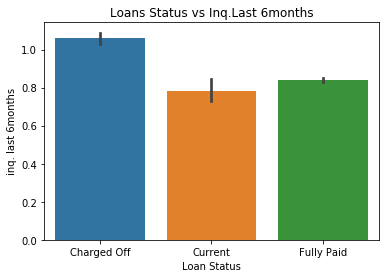

In [77]:
sns.barplot(y="inq_last_6mths", x="loan_status",data=df)
plt.title("Loans Status vs Inq.Last 6months")
plt.xlabel("Loan Status")
plt.ylabel("inq. last 6months")
plt.show()

### Analysis for pub_rec column
Here, we can see that person which have more number of public records are more likely to default.

In [78]:
df['pub_rec'].value_counts()

0    37601
1     2056
2       51
3        7
4        2
Name: pub_rec, dtype: int64

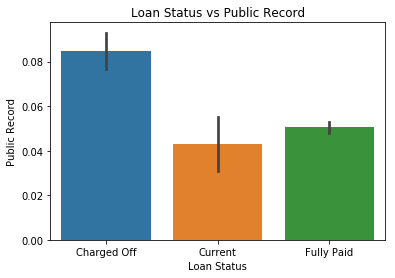

In [79]:
sns.barplot(x='loan_status', y='pub_rec', data=df)
plt.title("Loan Status vs Public Record")
plt.xlabel("Loan Status")
plt.ylabel("Public Record")
plt.show()

### Analysis for open_acc column
Here, it says that the open accont have no specific relation to the loan status.

In [80]:
df.open_acc.describe()

count    39717.000000
mean         9.294408
std          4.400282
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

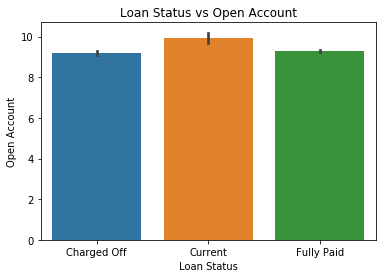

In [81]:
sns.barplot(x='loan_status', y='open_acc', data =df)
plt.title("Loan Status vs Open Account")
plt.xlabel("Loan Status")
plt.ylabel("Open Account")
plt.show()

### Analysis for revol_util column
It clearly says that where there is high utitization,there are more chances of default.

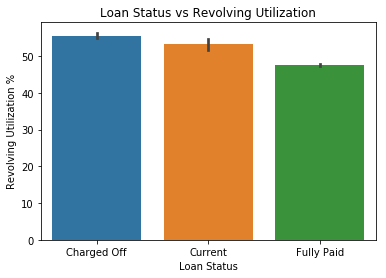

In [82]:
sns.barplot(x='loan_status', y='revol_util', data=df)
plt.title("Loan Status vs Revolving Utilization")
plt.xlabel("Loan Status")
plt.ylabel("Revolving Utilization %")
plt.show()

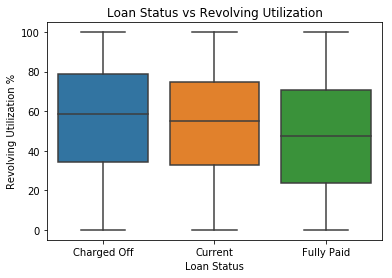

In [83]:
sns.boxplot(x='loan_status', y='revol_util', data=df)
plt.title("Loan Status vs Revolving Utilization")
plt.xlabel("Loan Status")
plt.ylabel("Revolving Utilization %")
plt.show()

### Analysis for credit_age_days column
From below graph we can say that this column has no signifacnce for loan to be default.

In [84]:
df["credit_age_days"].describe()

count    39717.000000
mean      5037.070574
std       2501.580476
min       1095.000000
25%       3348.000000
50%       4595.000000
75%       6239.000000
max      23892.000000
Name: credit_age_days, dtype: float64

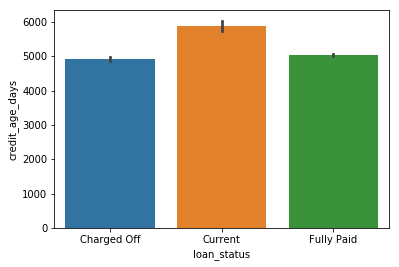

In [85]:
sns.barplot(x='loan_status', y="credit_age_days", data = df)


### Analysis for delinq_2yrs column
As this value will not be available during loan approval phas this column will not be considered for further analysis. This is a loan specific value and once the loan is approved after that any delinquencies occur then that will be tracked in this column against that loan.

# Bivariate Analysis

## Analysis for term & dti columns
So we can clearly say that the more there is dti the more will be the duration.

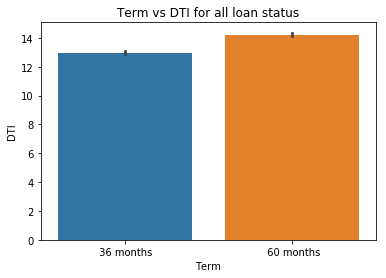

In [86]:
sns.barplot(x='term', y='dti', data=df)
plt.title("Term vs DTI for all loan status")
plt.xlabel("Term")
plt.ylabel("DTI")
plt.show()

### Analysis for dti & revol_util columns
From this we can derive that where dti is high and revol.utilization% is high, there loans are likely to default.

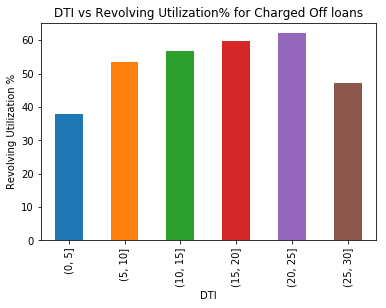

In [87]:
bins= [0,5,10,15,20,25,30]
df2 = Charged_off.groupby(pd.cut(Charged_off['dti'], bins=bins)).revol_util.mean()
df2.plot(kind='bar')
plt.title("DTI vs Revolving Utilization% for Charged Off loans")
plt.xlabel("DTI")
plt.ylabel("Revolving Utilization %")
plt.show()

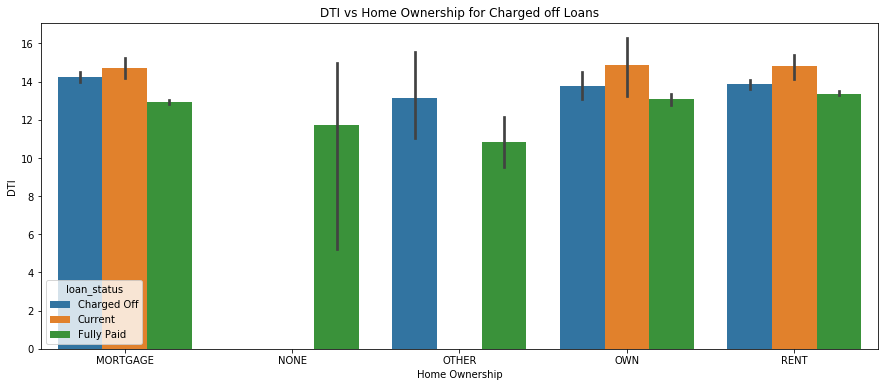

In [88]:
plt.figure(figsize=(15,6))
sns.barplot(x='home_ownership',y='dti',hue='loan_status',data=df)
plt.title("DTI vs Home Ownership for Charged off Loans")
plt.xlabel("Home Ownership")
plt.ylabel("DTI")
plt.show()

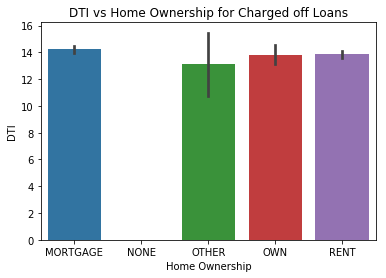

In [89]:
sns.barplot(x='home_ownership',y='dti',data=Charged_off)
plt.title("DTI vs Home Ownership for Charged off Loans")
plt.xlabel("Home Ownership")
plt.ylabel("DTI")
plt.show()

### Analysis for annual_inc & verification status columns
Analysis from below graph is wherever charged off - annual income is less. Verfication status does not have any significance here.

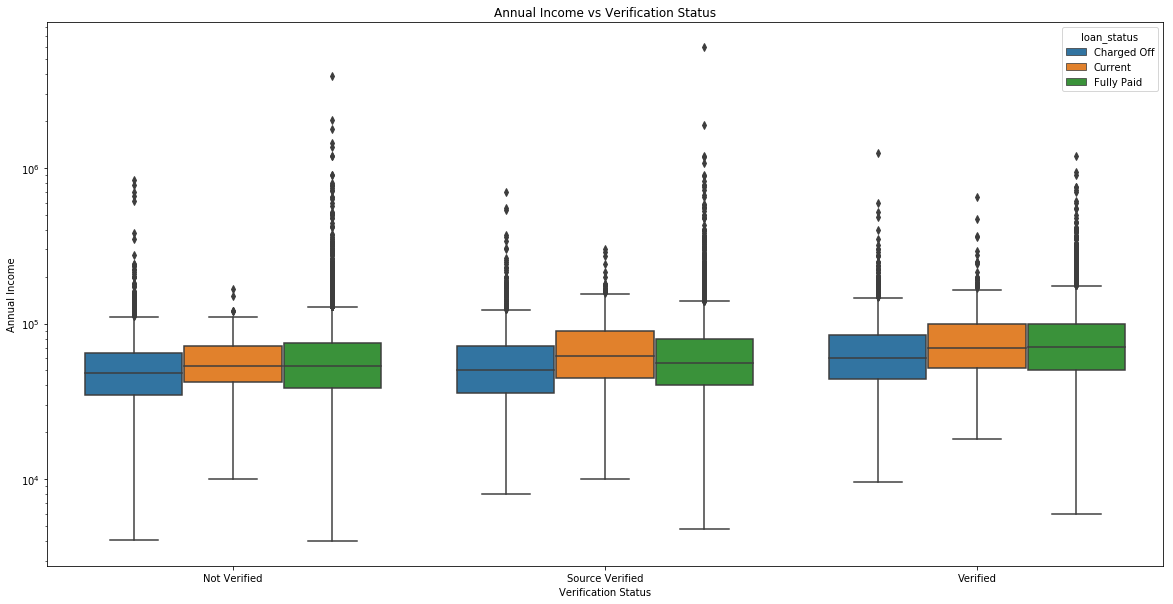

In [90]:
plt.figure(figsize=(20,10))
sns.boxplot(x="verification_status", y="annual_inc",hue="loan_status",data=df)
plt.title("Annual Income vs Verification Status")
plt.xlabel("Verification Status")
plt.ylabel("Annual Income")
plt.yscale('log')
plt.show() 

### Analysis for home_ownership & annual_inc columns
From below it is clear that if it is rented and annual income is low then loan is likely to default.

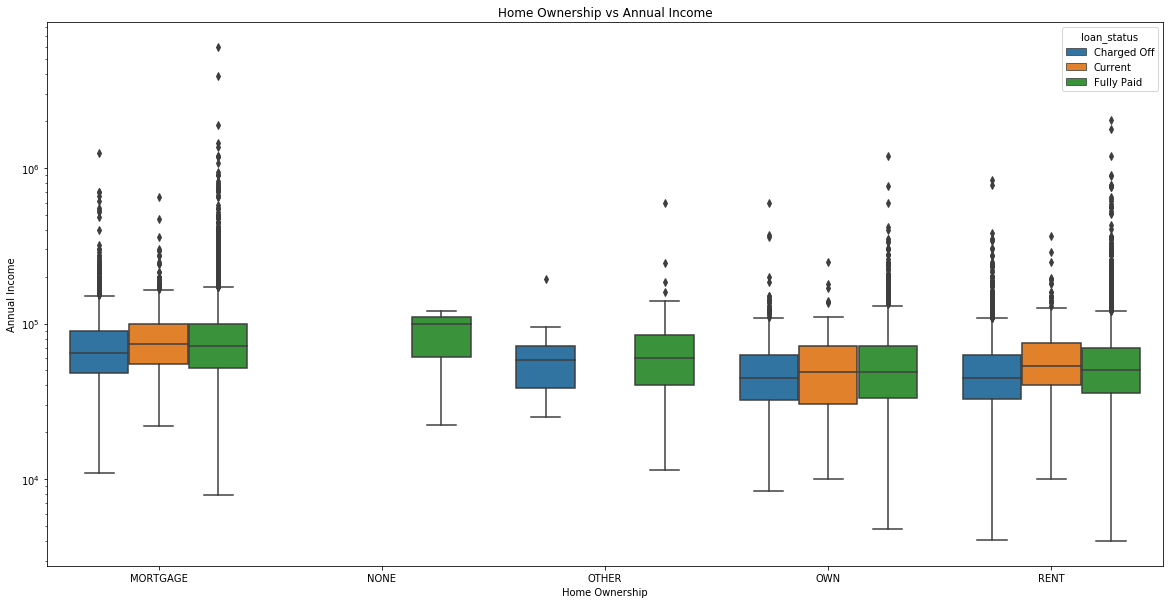

In [91]:
plt.figure(figsize=(20,10))
sns.boxplot(x="home_ownership", y="annual_inc",hue="loan_status",data=df)
plt.title("Home Ownership vs Annual Income")
plt.xlabel("Home Ownership")
plt.ylabel("Annual Income")
plt.yscale('log')
plt.show() 

### Analysis for pub_rec & int_rate columns
From below graph we can see the more the public record the more chances of risk. Person having more public record, either loan can be given with high interest rate or the application can be denied.

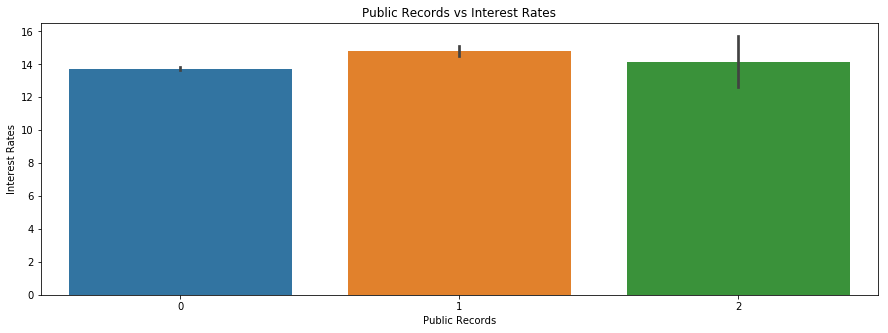

In [92]:
plt.figure(figsize=(15,5))
sns.barplot(y="int_rate", x="pub_rec",data=Charged_off)
plt.title("Public Records vs Interest Rates")
plt.xlabel("Public Records")
plt.ylabel ("Interest Rates")
plt.show()

### As there is high positive correlation between pub_rec and pub_rec_bankruptcies column, we are not doing separate analysis with pub_rec_bankruptcies column.

In [93]:
df['pub_rec'].corr(df['pub_rec_bankruptcies'])

0.8430322285434397

## Correlation between entire data set

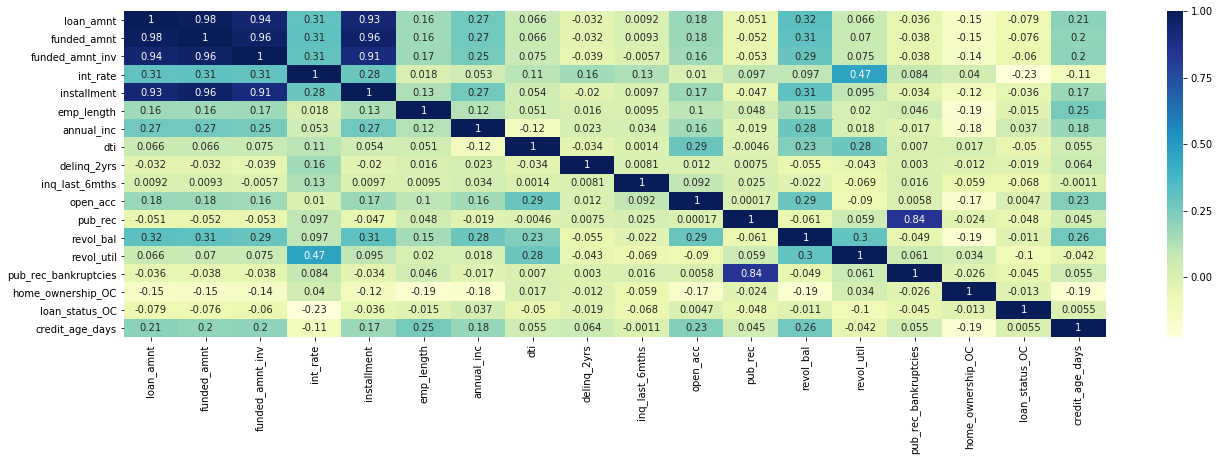

In [94]:
cor = df.corr()
plt.figure(figsize=(22,6))
sns.heatmap(cor,cmap="YlGnBu", annot=True)
plt.show()

#  Top 5 Risk Contributing Factors
 According to our above analysis, we find below 5 columns as top contibuting for risk.
1. dti
2. home_ownership
3. pub_rec
4. revol_util
5. inq_last_6mths

## Secondary analysis on addr_state column

####  Here, we are getting % of charged off in each state.

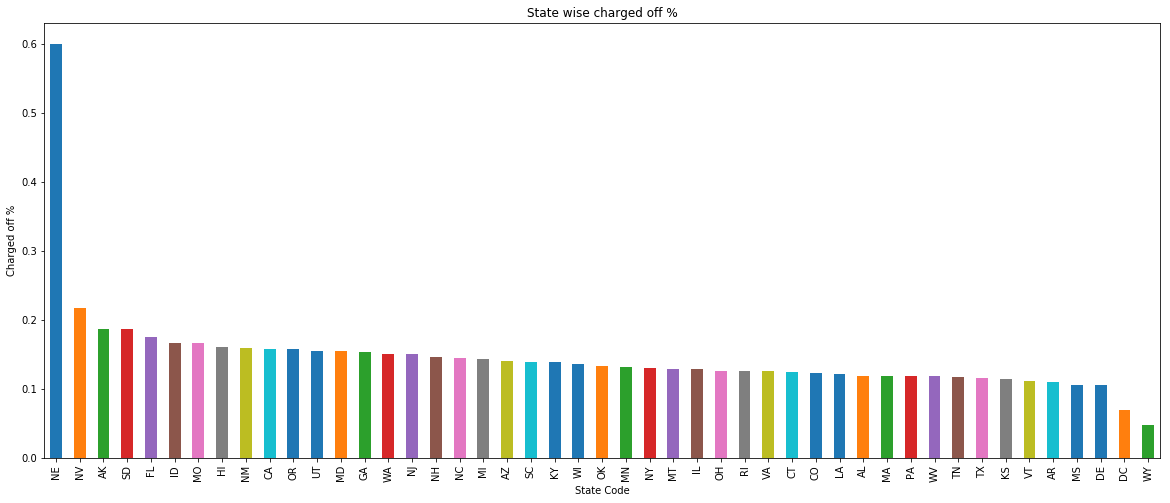

In [97]:
ln_charge_pcnt_statwise=df.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values(ascending=False)
plt.figure(figsize=(20,8 ))
ln_charge_pcnt_statwise.plot.bar()
plt.title("State wise charged off %")
plt.xlabel("State Code")
plt.ylabel("Charged off %")
plt.show()

#### Since the percenatge is giving wrong interepretation, we have done based on count. NE charge off% is 60%, but issued loan(5) is less compare to other state. So we are plotting below graph by considering count instead of %.

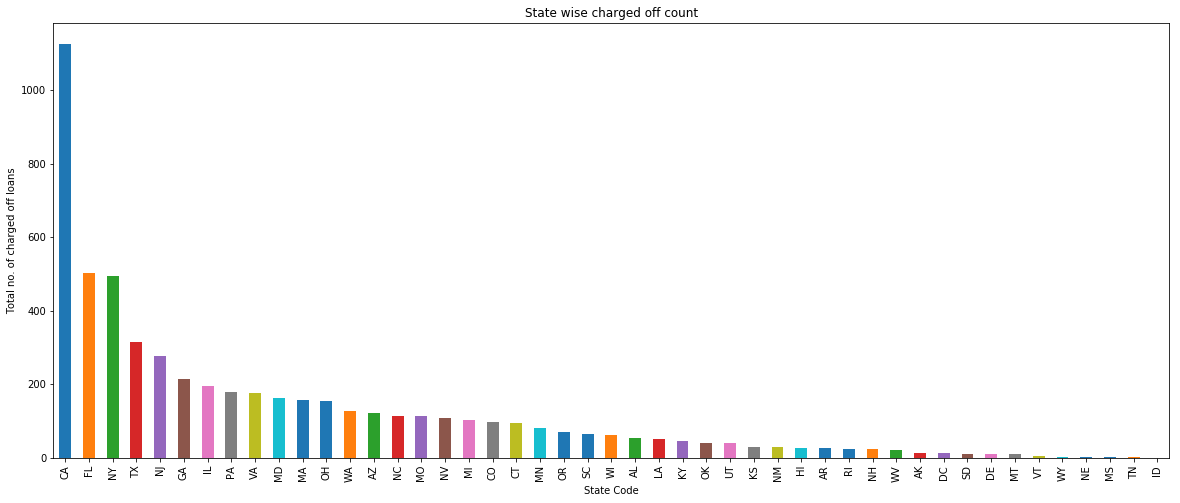

In [98]:
ln_charge_count_statwise=df.groupby('addr_state')['loan_status'].value_counts().loc[:,'Charged Off'].sort_values(ascending=False)
plt.figure(figsize=(20,8 ))
ln_charge_count_statwise.plot.bar()
plt.title("State wise charged off count")
plt.xlabel("State Code")
plt.ylabel("Total no. of charged off loans")
plt.show()